In [43]:
import yfinance as yf
from tqdm import tqdm
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
import string
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from yahoofinancials import YahooFinancials

In [186]:
building = pd.read_csv('building_permits.csv', header=None)

In [219]:
ism = pd.read_csv('ism_pmi.csv', header=None)

In [220]:
ism.columns = ['Date', 'PMI']

In [187]:
building.columns = ['Date', 'Permits']


In [188]:
y = 0
yl = []
month = []
for year in range(2015,2021):
    y = 0
    for x in range(1,13):
    
        
        yl.append(year + y)
        month.append('%i-%i' % (year,x))
        y+= (1/12)

In [199]:
def getYearMonthIndex(dates):
    idx = []
    mnth = []
    for i in yl:
        
        dt = dates.values
        # closest date from input sequence
        ix_s = np.argmin(abs(dt-i))
        # closest ref from selected date
        mnth.append(month[np.argmin(abs(yl-dt[ix_s]))])
        
        idx.append(ix_s)
        
    return list(dict.fromkeys(idx)), list(dict.fromkeys(mnth))

In [231]:
ix, mnth = getYearMonthIndex(building['Date'])

building = building.iloc[ix]

building['Month'] = mnth

building=building.drop_duplicates().reset_index()

building['Permits_rnd'] = building['Permits'].apply(round)

In [232]:
ix, mnth = getYearMonthIndex(ism['Date'])

ism = ism.iloc[ix]

ism['Month'] = mnth

ism = ism.drop_duplicates().reset_index()

# building['Permits_rnd'] = building['Permits'].apply(round)

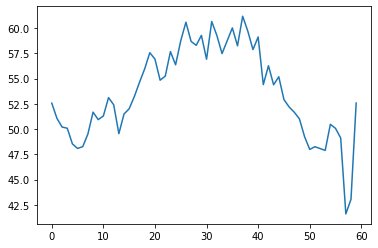

In [229]:
ism['PMI'].plot()

In [233]:
ism['Month'] = building['Month']

In [235]:
ism['Permits'] = building['Permits_rnd']

In [237]:
ism = ism[['Month', 'Permits', 'PMI']]

In [252]:
pd.DatetimeIndex(ism.Month.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m')))

DatetimeIndex(['2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
      

In [241]:
pd.to_datetime(ism.Month, '%Y-%m-%d')

AssertionError: 

In [133]:
yahoo_financials = YahooFinancials('AAPL')

data = yahoo_financials.get_historical_price_data(start_date='2000-01-01', 
                                                  end_date='2019-12-31', 
                                                  time_interval='daily')

tsla_df = pd.DataFrame(data['AAPL']['prices'])
tsla_df = tsla_df.drop('date', axis=1).set_index('formatted_date')
tsla_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200,3.460857
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400,3.169071
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400,3.215448
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200,2.937188
2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600,3.076317


In [253]:
covid = pd.read_csv('day_wise.csv')

In [254]:
covid

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
181,2020-07-21,14947078,616557,8364986,5965535,233565,6238,174209,4.12,55.96,7.37,187
182,2020-07-22,15227725,623540,8541255,6062930,280647,6983,176269,4.09,56.09,7.30,187
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187


In [255]:
covid['pct_chg_dth_100'] = covid['Deaths / 100 Cases'].pct_change()

In [256]:
covid['pct_chg_new_cases'] = covid['New cases'].pct_change()

In [257]:
full_covid = pd.read_csv('full_grouped.csv')

In [258]:
covid_us = full_covid[full_covid['Country/Region'] == 'US'].reset_index()

In [259]:
covid_us.index = pd.DatetimeIndex(covid_us['Date'])
covid.index = pd.DatetimeIndex(covid['Date'])

In [260]:
import pickle
from tqdm import tqdm
from itertools import zip_longest
letters = string.ascii_uppercase
tickers = []
exchanges = ['NASDAQ']
for letter in tqdm(letters):
        try:
            res = requests.get("http://eoddata.com/stocklist/NASDAQ/%s.htm" % letter)
            soup = BeautifulSoup(res.content,"html.parser")
            table = soup.find_all('table')[5] 
            tickers = tickers + pd.read_html(str(table))[0]['Code'].to_list()
        except:
            pass

100%|██████████| 26/26 [00:32<00:00,  1.25s/it]


In [11]:
tickers

['A',
 'AA',
 'AAN',
 'AAP',
 'AAT',
 'AB',
 'ABB',
 'ABBV',
 'ABC',
 'ABEV',
 'ABG',
 'ABM',
 'ABR',
 'ABR-A',
 'ABR-B',
 'ABR-C',
 'ABT',
 'AC',
 'ACA',
 'ACB',
 'ACC',
 'ACCO',
 'ACE.W',
 'ACEL',
 'ACH',
 'ACI',
 'ACM',
 'ACN',
 'ACP',
 'ACRE',
 'ACV',
 'ADC',
 'ADCT',
 'ADM',
 'ADNT',
 'ADS',
 'ADSW',
 'ADT',
 'ADX',
 'AEB',
 'AEE',
 'AEFC',
 'AEG',
 'AEL',
 'AEL-A',
 'AEL-B',
 'AEM',
 'AEO',
 'AEP',
 'AEP-B',
 'AER',
 'AES',
 'AFB',
 'AFC',
 'AFG',
 'AFGB',
 'AFGC',
 'AFGD',
 'AFGH',
 'AFI',
 'AFL',
 'AFT',
 'AG',
 'AGCO',
 'AGD',
 'AGI',
 'AGM',
 'AGM-A',
 'AGM-C',
 'AGM-D',
 'AGM-E',
 'AGM.A',
 'AGO',
 'AGO-B',
 'AGO-E',
 'AGO-F',
 'AGR',
 'AGRO',
 'AGS',
 'AGX',
 'AHC',
 'AHH',
 'AHH-A',
 'AHL-C',
 'AHL-D',
 'AHL-E',
 'AHT',
 'AHT-D',
 'AHT-F',
 'AHT-G',
 'AHT-H',
 'AHT-I',
 'AI',
 'AI-B',
 'AI-C',
 'AIC',
 'AIF',
 'AIG',
 'AIG-A',
 'AIG.W',
 'AIN',
 'AIO',
 'AIR',
 'AIT',
 'AIV',
 'AIW',
 'AIZ',
 'AIZP',
 'AJG',
 'AJRD',
 'AJX',
 'AJXA',
 'AKO.A',
 'AKO.B',
 'AKR',
 'AL',
 'AL

In [10]:
zip_longest(exchanges, letters)

In [161]:
ticker = yf.Ticker('AAPL')

In [165]:
ticker.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [144]:
data = ticker.history(period='1mo', interval='5m')

In [154]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2020-06-25 09:30:00-04:00,92.71,93.25,92.03,92.66,20623,0,0
2020-06-25 09:35:00-04:00,92.54,93.27,92.39,93.26,7153,0,0
2020-06-25 09:40:00-04:00,93.23,93.23,91.53,91.82,18977,0,0
2020-06-25 09:45:00-04:00,92.14,92.30,91.81,91.88,12860,0,0
2020-06-25 09:50:00-04:00,91.71,92.97,91.71,92.97,7035,0,0
...,...,...,...,...,...,...,...
2020-07-24 15:35:00-04:00,85.58,86.06,85.51,85.89,14045,0,0
2020-07-24 15:40:00-04:00,85.91,85.97,85.63,85.63,12165,0,0
2020-07-24 15:45:00-04:00,85.63,85.90,85.56,85.83,10229,0,0


In [ ]:
recommendDict = {'class': ['']}

In [158]:
ticker.get_recommendations()

,Firm,To Grade,From Grade,Action
Date,,,,
2018-02-28 12:17:25,Ladenburg Thalmann,Buy,Neutral,up
2018-03-16 17:16:16,CL King,Neutral,Buy,down
2018-05-10 16:45:48,Imperial Capital,In-Line,In-Line,main
2018-06-07 11:43:32,JP Morgan,Neutral,Overweight,down
2018-08-08 11:49:44,Craig-Hallum,Hold,Buy,down
2018-08-09 10:18:37,Imperial Capital,Outperform,In-Line,up
2018-10-15 12:39:01,Ladenburg Thalmann,Neutral,Buy,down
2018-11-08 11:08:39,JP Morgan,Overweight,Neutral,up
2018-11-09 12:19:05,Baird,Outperform,Neutral,up


In [150]:
ticker.option_chain().puts.contractSymbol.tolist()

['AAXN200821P00050000',
 'AAXN200821P00055000',
 'AAXN200821P00060000',
 'AAXN200821P00065000',
 'AAXN200821P00070000',
 'AAXN200821P00075000',
 'AAXN200821P00080000',
 'AAXN200821P00085000',
 'AAXN200821P00090000',
 'AAXN200821P00095000',
 'AAXN200821P00100000',
 'AAXN200821P00105000',
 'AAXN200821P00110000',
 'AAXN200821P00130000',
 'AAXN200821P00135000',
 'AAXN200821P00140000',
 'AAXN200821P00150000']

In [151]:
tickers = yf.Tickers(ticker.option_chain().puts.contractSymbol.tolist())

In [153]:
tickers.history(period='1mo', interval='5m')

[*********************100%***********************]  17 of 17 completed

17 Failed downloads:
- AAXN200821P00060000: No data found for this date range, symbol may be delisted
- AAXN200821P00090000: No data found for this date range, symbol may be delisted
- AAXN200821P00055000: No data found for this date range, symbol may be delisted
- AAXN200821P00065000: No data found for this date range, symbol may be delisted
- AAXN200821P00050000: No data found for this date range, symbol may be delisted
- AAXN200821P00095000: No data found for this date range, symbol may be delisted
- AAXN200821P00140000: No data found for this date range, symbol may be delisted
- AAXN200821P00085000: No data found for this date range, symbol may be delisted
- AAXN200821P00130000: No data found for this date range, symbol may be delisted
- AAXN200821P00080000: No data found for this date range, symbol may be delisted
- AAXN200821P00100000: No data found for this date range, symbol may be delisted
- AAXN200821P000

Empty DataFrame
Columns: [(Adj Close, AAXN200821P00050000), (Adj Close, AAXN200821P00055000), (Adj Close, AAXN200821P00060000), (Adj Close, AAXN200821P00065000), (Adj Close, AAXN200821P00070000), (Adj Close, AAXN200821P00075000), (Adj Close, AAXN200821P00080000), (Adj Close, AAXN200821P00085000), (Adj Close, AAXN200821P00090000), (Adj Close, AAXN200821P00095000), (Adj Close, AAXN200821P00100000), (Adj Close, AAXN200821P00105000), (Adj Close, AAXN200821P00110000), (Adj Close, AAXN200821P00130000), (Adj Close, AAXN200821P00135000), (Adj Close, AAXN200821P00140000), (Adj Close, AAXN200821P00150000), (Close, AAXN200821P00050000), (Close, AAXN200821P00055000), (Close, AAXN200821P00060000), (Close, AAXN200821P00065000), (Close, AAXN200821P00070000), (Close, AAXN200821P00075000), (Close, AAXN200821P00080000), (Close, AAXN200821P00085000), (Close, AAXN200821P00090000), (Close, AAXN200821P00095000), (Close, AAXN200821P00100000), (Close, AAXN200821P00105000), (Close, AAXN200821P00110000), (Close, AAXN200821P00130000), (Close, AAXN200821P00135000), (Close, AAXN200821P00140000), (Close, AAXN200821P00150000), (High, AAXN200821P00050000), (High, AAXN200821P00055000), (High, AAXN200821P00060000), (High, AAXN200821P00065000), (High, AAXN200821P00070000), (High, AAXN200821P00075000), (High, AAXN200821P00080000), (High, AAXN200821P00085000), (High, AAXN200821P00090000), (High, AAXN200821P00095000), (High, AAXN200821P00100000), (High, AAXN200821P00105000), (High, AAXN200821P00110000), (High, AAXN200821P00130000), (High, AAXN200821P00135000), (High, AAXN200821P00140000), (High, AAXN200821P00150000), (Low, AAXN200821P00050000), (Low, AAXN200821P00055000), (Low, AAXN200821P00060000), (Low, AAXN200821P00065000), (Low, AAXN200821P00070000), (Low, AAXN200821P00075000), (Low, AAXN200821P00080000), (Low, AAXN200821P00085000), (Low, AAXN200821P00090000), (Low, AAXN200821P00095000), (Low, AAXN200821P00100000), (Low, AAXN200821P00105000), (Low, AAXN200821P00110000), (Low, AAXN200821P00130000), (Low, AAXN200821P00135000), (Low, AAXN200821P00140000), (Low, AAXN200821P00150000), (Open, AAXN200821P00050000), (Open, AAXN200821P00055000), (Open, AAXN200821P00060000), (Open, AAXN200821P00065000), (Open, AAXN200821P00070000), (Open, AAXN200821P00075000), (Open, AAXN200821P00080000), (Open, AAXN200821P00085000), (Open, AAXN200821P00090000), (Open, AAXN200821P00095000), (Open, AAXN200821P00100000), (Open, AAXN200821P00105000), (Open, AAXN200821P00110000), (Open, AAXN200821P00130000), (Open, AAXN200821P00135000), (Open, AAXN200821P00140000), (Open, AAXN200821P00150000), (Volume, AAXN200821P00050000), (Volume, AAXN200821P00055000), (Volume, AAXN200821P00060000), (Volume, AAXN200821P00065000), (Volume, AAXN200821P00070000), (Volume, AAXN200821P00075000), (Volume, AAXN200821P00080000), (Volume, AAXN200821P00085000), (Volume, AAXN200821P00090000), (Volume, AAXN200821P00095000), (Volume, AAXN200821P00100000), (Volume, AAXN200821P00105000), (Volume, AAXN200821P00110000), (Volume, AAXN200821P00130000), (Volume, AAXN200821P00135000), ...]
Index: []

[0 rows x 102 columns]

In [140]:
import pickle
from tqdm import tqdm
tickDict = {}
for tick in tqdm(tickers[:10]):

    try:
        ticker = yf.Ticker(tick)
        recommend = ticker.get_recommendations()
        market_data = ticker.history(period='10y', prepost=True)
        market_data['date'] = market_data.index
        market_data['delta_day'] = (market_data['Close']-market_data['Open'])/market_data['Open']
        market_data['daily'] = (market_data['High']-market_data['Low'])/((market_data['High']+market_data['Low'])/2)
        market_data['fract_high'] = (market_data['High']-market_data['Open'])/market_data['Open']
        market_data['fract_low'] = (market_data['Open']-market_data['Low'])/market_data['Open']
        market_data['vol_change'] = market_data['Volume'].pct_change()
        
        rec_mat = recommend[['To Grade']].pivot_table(index=recommend.index.date, columns=['To Grade'], aggfunc=len, fill_value=0)
        mrkt_rec = market_data.join(rec_mat).fillna(0)
        mrkt_rec['forecast'] = mrkt_rec['Open'].shift(-1)-mrkt_rec['Open']
        tickDict[tick] = mrkt_rec.dropna()
        
    except:
        pass


100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


In [139]:
ticker.option_chain().puts.volume.sum()/ticker.option_chain().calls.volume.sum()

0.3555045871559633

In [374]:
covid_us

,index,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
Date,,,,,,,,,,,
2020-01-22,173,2020-01-22,US,1,0,0,1,0,0,0,Americas
2020-01-23,360,2020-01-23,US,1,0,0,1,0,0,0,Americas
2020-01-24,547,2020-01-24,US,2,0,0,2,1,0,0,Americas
2020-01-25,734,2020-01-25,US,2,0,0,2,0,0,0,Americas
2020-01-26,921,2020-01-26,US,5,0,0,5,3,0,0,Americas
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-21,34020,2020-07-21,US,3899211,142121,1182018,2575072,64534,1096,21931,Americas
2020-07-22,34207,2020-07-22,US,3970121,143316,1210849,2615956,70910,1195,28831,Americas
2020-07-23,34394,2020-07-23,US,4038816,144430,1233269,2661117,68695,1114,22420,Americas


In [20]:
tickDict.keys()

dict_keys(['AACG', 'AAL', 'AAOI', 'AAPL', 'AAWW', 'AAXN'])

In [375]:
appl = tickDict['AAPL']
appl = appl.loc[covid_us.index[0]:covid_us.index[-1]]

In [385]:
appl_cov = appl.join(covid_us)

In [386]:
appl_cov = appl_cov.join(covid[['pct_chg_dth_100','pct_chg_new_cases']])

In [387]:
appl_cov

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,delta_day,daily,...,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,pct_chg_dth_100,pct_chg_new_cases
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,316.97,318.37,315.70,316.09,25458100,0.0,0.0,2020-01-22,-0.002776,0.008422,...,1,0,0,1,0,0,0,Americas,NaN,NaN
2020-01-23,316.31,317.94,314.05,317.61,26118000,0.0,0.0,2020-01-23,0.004110,0.012310,...,1,0,0,1,0,0,0,Americas,-0.101307,inf
2020-01-24,318.63,321.69,315.91,316.70,36600500,0.0,0.0,2020-01-24,-0.006057,0.018130,...,2,0,0,2,1,0,0,Americas,0.003636,1.898990
2020-01-27,308.49,310.19,303.34,307.39,40485000,0.0,0.0,2020-01-27,-0.003566,0.022330,...,5,0,0,5,0,0,0,Americas,0.060606,0.182749
2020-01-28,311.02,316.79,310.61,316.08,40558500,0.0,0.0,2020-01-28,0.016269,0.019700,...,5,0,0,5,0,0,0,Americas,-0.160714,2.276885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-17,387.95,388.59,383.36,385.31,23046700,0.0,0.0,2020-07-17,-0.006805,0.013550,...,3647715,139266,1107204,2401245,71558,908,16559,Americas,-0.007026,-0.041601
2020-07-20,385.67,394.00,384.25,393.43,22579500,0.0,0.0,2020-07-20,0.020121,0.025056,...,3834677,141025,1160087,2533565,61417,491,28966,Americas,-0.007177,-0.036660
2020-07-21,396.69,397.00,386.97,388.00,25911500,0.0,0.0,2020-07-21,-0.021906,0.025588,...,3899211,142121,1182018,2575072,64534,1096,21931,Americas,-0.007229,0.129545


In [229]:
appl_cov.columns.tolist()

['Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Dividends',
 'Stock Splits',
 'date',
 'delta_day',
 'daily',
 'fract_high',
 'fract_low',
 'vol_change',
 '',
 'Buy',
 'Equal-Weight',
 'Equal-weight',
 'Hold',
 'Long-Term Buy',
 'Long-term Buy',
 'Market Outperform',
 'Market Perform',
 'Negative',
 'Neutral',
 'Outperform',
 'Overweight',
 'Perform',
 'Positive',
 'Reduce',
 'Sector Outperform',
 'Sector Perform',
 'Sector Weight',
 'Sell',
 'Strong Buy',
 'Underweight',
 'forecast',
 'index',
 'Date',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'New cases',
 'New deaths',
 'New recovered',
 'WHO Region',
 'pct_new_deaths',
 'pct_new_cases']

In [228]:
plt.scatter(appl_cov[['delta_day','pct_new_deaths','daily','fract_high','fract_low', 'pct_new_cases']])

TypeError: scatter() missing 1 required positional argument: 'y'

In [25]:
import random
random.randint(10,20)

11

In [39]:
cols = ['sequence',
    'closedate',
    'Dividends',
 'Stock Splits',
 'delta_day',
 'daily',
 'fract_high',
 'fract_low',
 'vol_change',
 'forecast']

In [36]:
tickDict.keys()

dict_keys(['AACG', 'AAL', 'AAOI', 'AAPL', 'AAWW', 'AAXN'])

In [35]:
random.choice(tickDict)

KeyError: 3

In [97]:
quotes = []
for i in tqdm(range(10000)):
    ticker_choice = random.choice(list(tickDict.keys()))
    df = tickDict[ticker_choice].reset_index()
    nrows = 30
    nrows_start = random.randint(0, len(df)-nrows)
    subset = df.iloc[nrows_start:nrows_start+nrows]
    subset['closedate'] = max(subset['date'])
    subset['sequence'] = i
    quotes.append(subset[cols])
    
    
    

  0%|          | 0/10000 [00:00<?, ?it/s]/Users/craigledgerwood/ml_venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/craigledgerwood/ml_venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
100%|██████████| 10000/10000 [00:41<00:00, 239.99it/s]


In [44]:
quotes_df = pd.concat(quotes)

In [45]:
quotes_df.columns.tolist()

['sequence',
 'closedate',
 'Dividends',
 'Stock Splits',
 'delta_day',
 'daily',
 'fract_high',
 'fract_low',
 'vol_change',
 'forecast']

In [104]:
dividends = np.array(quotes_df['Dividends'].values)
splits = np.array(quotes_df['Stock Splits'].values)
delta_day = np.array(quotes_df['delta_day'].values)
daily = np.array(quotes_df['daily'].values)
fract_high = np.array(quotes_df['fract_high'].values)
fract_low = np.array(quotes_df['fract_low'].values)
vol_change = np.array(quotes_df['vol_change'].values)
forecast = np.array(quotes_df['forecast'].values)
dates = np.array(quotes_df['closedate'].values)

In [96]:
print(np.mean(forecast), np.std(forecast))


0.030820279326802306 1.4820939712963646


In [67]:
import numpy as np
def scale(x):
    x_scale = (x - np.nanmean(x))/np.nanstd(x)
    return x_scale

In [81]:
x_list = []
for c in ['Dividends','Stock Splits','delta_day','daily','fract_high','fract_low','vol_change','forecast']:

    x_list.append(scale(np.array(quotes_df[c].values)))

/Users/craigledgerwood/ml_venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
X=np.nan_to_num(np.column_stack(x_list))

In [83]:
X.shape

(199050, 8)

In [84]:
X

array([[-0.02975046, -0.00776466,  0.35558257, ..., -0.85783127,
         0.        ,  2.77255005],
       [-0.02975046, -0.00776466, -0.05130486, ..., -0.60296025,
         0.        ,  0.06691865],
       [-0.02975046, -0.00776466,  0.51709608, ..., -0.8645999 ,
         0.        ,  4.20970589],
       ...,
       [-0.02975046, -0.00776466, -0.06302679, ..., -0.56979885,
         0.        , -0.22321141],
       [-0.02975046, -0.00776466,  0.53063792, ..., -0.85089056,
         0.        ,  0.66067317],
       [-0.02975046, -0.00776466,  0.07228387, ..., -0.78015396,
         0.        ,  0.28282938]])

In [85]:
from sklearn.mixture import GaussianMixture

In [127]:
n = np.arange(1,20)
bic = np.zeros(n.shape)
models = []
for i,j in enumerate(n):
    gmm = GaussianMixture(n_components=j)
    gmm.fit(X[:,:-1])
    bic[i]=gmm.bic(X[:,:-1])
    models.append(gmm)

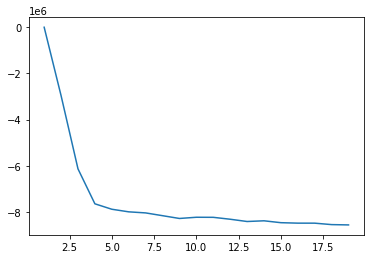

In [128]:
import matplotlib.pyplot as plt 
plt.plot(n,bic)
plt.show()

In [129]:
model = GaussianMixture(n_components=4,covariance_type='full',n_init=100,random_state=7)

In [130]:
model.fit(X[:,:-1])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=100,
                precisions_init=None, random_state=7, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [131]:
for i in range(model.n_components):
    print('{0}th hidden state'.format(i))
    print('mean= ', np.round(model.means_[i], 3))
    print('var= ', np.round(np.diag(model.covariances_[i]),3))
    print()

0th hidden state
mean=  [-0.03  -0.008 -0.001  0.895  0.413  0.701  0.   ]
var=  [0.    0.    1.764 0.461 0.664 1.715 0.   ]

1th hidden state
mean=  [-0.03  -0.008 -0.02  -0.391 -0.204 -0.283  0.   ]
var=  [0.    0.    0.186 0.109 0.071 0.233 0.   ]

2th hidden state
mean=  [-3.00000e-02  1.28789e+02  3.11000e-01 -4.83000e-01 -2.09000e-01
 -4.21000e-01  0.00000e+00]
var=  [0. 0. 0. 0. 0. 0. 0.]

3th hidden state
mean=  [ 2.05  -0.008  1.051  3.933  3.035  1.925  0.   ]
var=  [65.639  0.    27.732 18.465 39.992 10.747  0.   ]



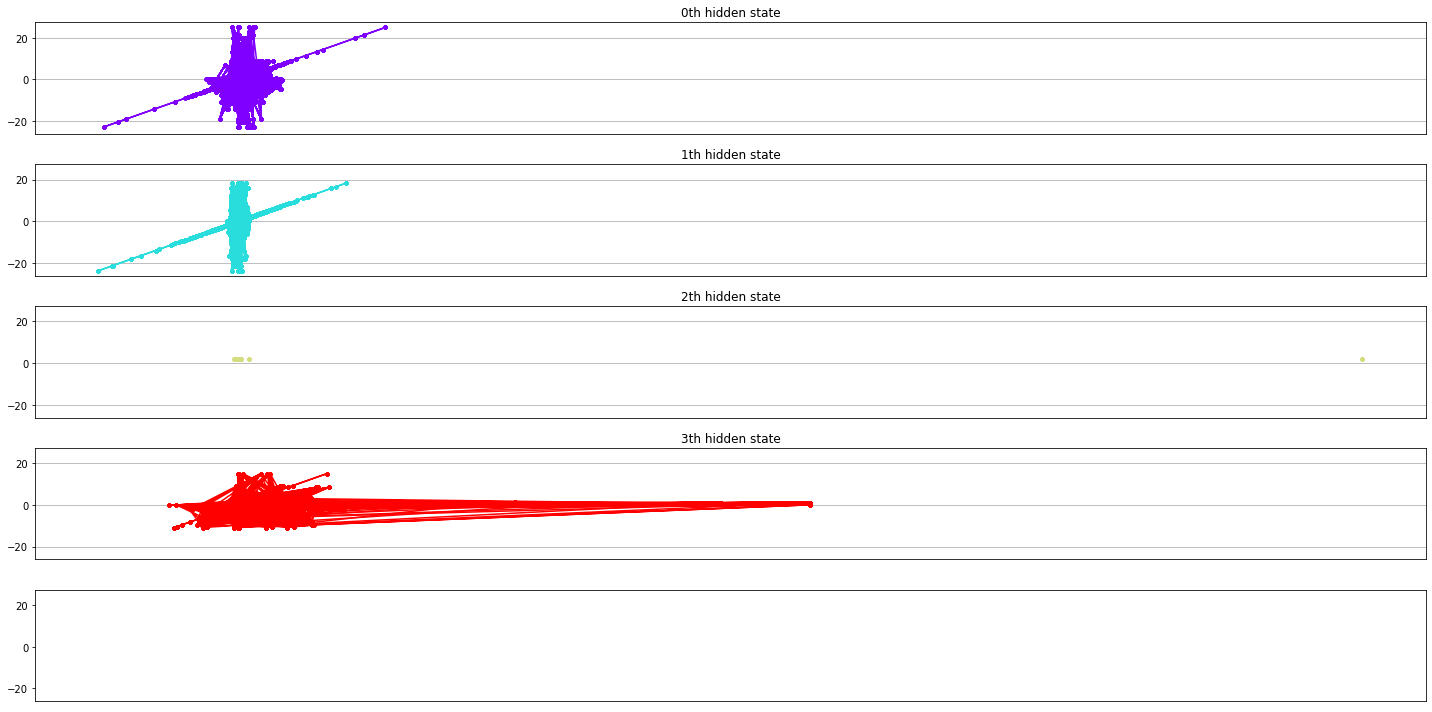

In [132]:
from matplotlib.cm import rainbow
from matplotlib.dates import MonthLocator, YearLocator
hidden_states = model.predict(X[:,:-1])
date = X
fig, axs = plt.subplots(5, sharex=True, sharey=True, figsize=(20,10))
colours = rainbow(np.linspace(0,1,model.n_components))
for i, (ax,colour) in enumerate(zip(axs,colours)):
    mask = hidden_states == i
    ax.plot_date(date[mask], forecast[mask], '.-', c=colour)
    ax.set_title('{0}th hidden state'.format(i))
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())
    ax.grid(True)
    plt.tight_layout()
plt.show()

In [57]:
import pandas as pd

rec_grp = rec.groupby(rec.index.date)['To Grade'].apply(list)
rec_grp['dict'] = rec_grp.apply(Counter)

In [58]:
rec2mat = pd.DataFrame(columns=rec['To Grade'].unique())

In [59]:
for row in rec_grp['dict']:
    pd.DataFrame(row, index=row.index)
    rec2mat.append()
    

AttributeError: 'Counter' object has no attribute 'index'

In [71]:
rec_mat = rec[['recomendation']].pivot_table(index=rec.index.date, columns=['recomendation'], aggfunc=len, fill_value=0)

mrkt_rec = mrkt.join(rec_mat).fillna(0)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit_transform(rec_grp)

AttributeError: 'list' object has no attribute 'lower'

In [22]:
rec_grp.tolist()

[['Hold'],
 ['Buy'],
 ['Sector Perform',
  'Outperform',
  'Overweight',
  'Buy',
  'Overweight',
  'Neutral',
  'Neutral',
  'Outperform',
  'Overweight',
  'Neutral',
  'Outperform',
  'Neutral',
  'Market Perform',
  'Neutral',
  'Underperform',
  'Hold',
  'Equal-Weight'],
 ['Neutral'],
 ['Buy', 'Outperform'],
 ['Market Perform'],
 ['Buy'],
 ['Buy'],
 ['Buy'],
 ['Neutral'],
 ['Buy', 'Overweight'],
 ['Equal-Weight'],
 ['Buy', 'Hold'],
 ['Buy', 'Buy'],
 ['Overweight'],
 ['Sell'],
 ['Buy'],
 ['Buy'],
 ['Equal-Weight', 'Buy', 'Buy', 'Hold', 'Buy', 'Buy', 'Buy'],
 ['Outperform'],
 ['Overweight'],
 ['Buy', 'Neutral', 'Outperform'],
 ['Buy'],
 ['Buy'],
 ['Buy', 'Outperform'],
 ['Overweight', 'Overweight'],
 ['Hold'],
 ['Outperform', 'Buy'],
 ['Buy'],
 ['Buy'],
 ['Outperform'],
 ['Neutral'],
 ['Neutral', 'Hold', 'Hold', 'Hold', 'Buy', 'Market Perform'],
 ['Market Perform'],
 ['Sell'],
 ['Equal-Weight'],
 ['Market Perform'],
 ['Buy'],
 ['Buy', 'Strong Buy'],
 ['Strong Buy'],
 ['Outperform',

In [23]:
from collections import Counter

Counter(rec_grp.tolist())

TypeError: unhashable type: 'list'

In [44]:
recommend['To Grade'].unique()

array(['Overweight', 'Hold', 'Buy', 'Sell', 'Neutral', 'Underperform',
       'Outperform', 'Equal-Weight', '', 'Market Perform', 'Underweight',
       'Sector Perform', 'Perform', 'Sector Weight', 'In-Line',
       'Underperformer', 'Market Outperform', 'Peer Perform'],
      dtype=object)

In [48]:
closes = ticker.history(period='5y')

In [49]:
closes

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-07-27,262.43,264.43,250.79,253.01,4694200,0,0
2015-07-28,255.75,265.40,251.84,264.82,3895800,0,0
2015-07-29,264.27,267.89,262.00,263.82,2790100,0,0
2015-07-30,262.69,266.94,262.11,266.79,2034600,0,0
2015-07-31,267.60,269.36,265.12,266.15,2222600,0,0
...,...,...,...,...,...,...,...
2020-07-20,1519.01,1650.00,1488.00,1643.00,17121400,0,0
2020-07-21,1639.93,1675.00,1558.00,1568.36,16157300,0,0
2020-07-22,1599.00,1626.42,1562.00,1592.33,14161100,0,0


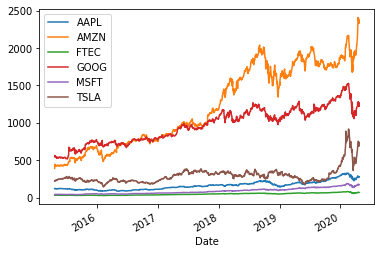

In [29]:
closes.plot()

In [273]:
closes = appl_cov[['delta_day','pct_new_deaths','daily','fract_high','fract_low', 'pct_new_cases']]

In [275]:
closes.replace([np.inf, -np.inf], np.nan).dropna()

,delta_day,pct_new_deaths,daily,fract_high,fract_low,pct_new_cases
Date,,,,,,
2020-03-03,-0.047251,-0.800000,0.061713,0.001090,0.058841,-0.130435
2020-03-04,0.021242,3.000000,0.034425,0.023474,0.011162,0.550000
2020-03-05,-0.008788,-0.750000,0.027555,0.013640,0.013912,1.258065
2020-03-06,0.024925,1.000000,0.033514,0.031254,0.002738,-0.314286
2020-03-09,0.009162,-0.750000,0.055779,0.054364,0.002851,-0.403509
...,...,...,...,...,...,...
2020-07-17,-0.006805,-0.037116,0.013550,0.001650,0.011831,-0.073743
2020-07-20,0.020121,0.183133,0.025056,0.021599,0.003682,-0.006953
2020-07-21,-0.021906,1.232179,0.025588,0.000781,0.024503,0.050751


In [276]:
closes

,delta_day,pct_new_deaths,daily,fract_high,fract_low,pct_new_cases
Date,,,,,,
2020-01-22,-0.002776,NaN,0.008422,0.004417,0.004007,NaN
2020-01-23,0.004110,NaN,0.012310,0.005153,0.007145,NaN
2020-01-24,-0.006057,NaN,0.018130,0.009604,0.008537,inf
2020-01-27,-0.003566,NaN,0.022330,0.005511,0.016694,-1.000000
2020-01-28,0.016269,NaN,0.019700,0.018552,0.001318,NaN
...,...,...,...,...,...,...
2020-07-17,-0.006805,-0.037116,0.013550,0.001650,0.011831,-0.073743
2020-07-20,0.020121,0.183133,0.025056,0.021599,0.003682,-0.006953
2020-07-21,-0.021906,1.232179,0.025588,0.000781,0.024503,0.050751


In [278]:
import pandas as pd
from sklearn import preprocessing
closes = closes.replace([np.inf, -np.inf], np.nan).dropna()
x = closes.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
closes = pd.DataFrame(x_scaled, index= closes.index, columns=closes.columns)

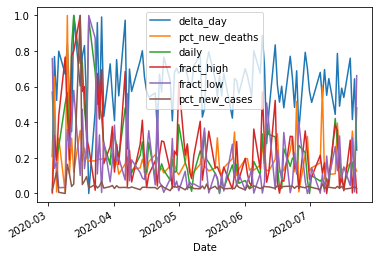

In [279]:
closes.plot()

In [280]:
import statsmodels.api as sm

In [281]:
closes[1:]

,delta_day,pct_new_deaths,daily,fract_high,fract_low,pct_new_cases
Date,,,,,,
2020-03-04,0.769146,0.655172,0.272341,0.326200,0.141379,0.070072
2020-03-05,0.522944,0.008621,0.197481,0.186132,0.176908,0.122106
2020-03-06,0.799344,0.310345,0.262421,0.437007,0.032511,0.006557
2020-03-09,0.670108,0.008621,0.505045,0.766152,0.033976,0.000000
2020-03-10,0.837635,1.000000,0.566798,0.470068,0.359492,0.163661
...,...,...,...,...,...,...
2020-07-17,0.539202,0.131532,0.044862,0.015358,0.150027,0.024234
2020-07-20,0.759954,0.169506,0.170248,0.299485,0.044710,0.029142
2020-07-21,0.415394,0.350376,0.176040,0.002993,0.313779,0.033383


In [282]:
model = sm.tsa.VAR(closes)

/Users/craigledgerwood/ml_venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [283]:
X = model.select_order(maxlags=17)

In [284]:
X.summary()

,AIC,BIC,FPE,HQIC
0,-41.42,-41.25,1.022e-18,-41.35
1,-41.49,-40.26,9.641e-19,-40.99
2,-41.14,-38.87,1.374e-18,-40.23
3,-41.06,-37.73,1.554e-18,-39.72
4,-40.90,-36.53,1.938e-18,-39.14
5,-40.72,-35.30,2.604e-18,-38.54
6,-40.55,-34.08,3.661e-18,-37.95
7,-40.58,-33.06,4.645e-18,-37.56
8,-40.70,-32.13,6.060e-18,-37.26
9,-40.69,-31.07,1.078e-17,-36.82


In [286]:
model_fit = model.fit(maxlags=6)

In [256]:
model_fit.acorr()

array([[[ 1.        ,  0.55579094,  0.08540102,  0.76177568,
         -0.83513675,  0.01424383],
        [ 0.555791  ,  1.        ,  0.32569696,  0.56873986,
         -0.37309798, -0.24613345],
        [ 0.08540116,  0.32569704,  1.        ,  0.59966329,
          0.24973009, -0.32076839],
        [ 0.76177578,  0.56873981,  0.59966325,  1.        ,
         -0.62499527, -0.2163568 ],
        [-0.83513673, -0.37309785,  0.24973012, -0.62499524,
          1.        , -0.03966638],
        [ 0.01424366, -0.24613358, -0.32076833, -0.21635684,
         -0.03966626,  1.        ]],

       [[-0.36291719, -0.03030687,  0.65775048,  0.18811372,
          0.40324442, -0.73065871],
        [-0.45797684, -0.32063283,  0.60109503,  0.03610157,
          0.53382615, -0.28058115],
        [-0.47233539, -0.72185628,  0.2117934 , -0.26183663,
          0.53612618,  0.27831275],
        [-0.62953678, -0.4967378 ,  0.5244609 , -0.15823469,
          0.70053196, -0.32220859],
        [ 0.31065162, -0.095

In [287]:
closes.index[-1:]

DatetimeIndex(['2020-07-23'], dtype='datetime64[ns]', name='Date', freq=None)

In [300]:
lag_order = model_fit.k_ar
n_forecast = 5
forecast = pd.DataFrame(model_fit.forecast(closes[:-n_forecast].values[-lag_order:], n_forecast),
                        columns=closes.columns,
                        index=closes.index[-n_forecast:])

In [301]:
model_fit.fittedvalues

,delta_day,pct_new_deaths,daily,fract_high,fract_low,pct_new_cases
Date,,,,,,
2020-03-11,0.487511,0.114965,0.231045,0.110401,0.282097,0.161622
2020-03-12,0.358574,0.208584,0.640801,0.564775,0.369110,0.103784
2020-03-13,0.921168,0.126655,0.886752,0.670421,0.559811,0.066240
2020-03-16,0.580106,0.360127,0.791828,0.961895,0.202578,0.790880
2020-03-17,0.772649,0.175932,0.756522,0.593888,0.472243,0.040697
...,...,...,...,...,...,...
2020-07-17,0.623720,0.092531,0.189668,0.164635,0.185970,-0.038080
2020-07-20,0.654267,0.157309,0.154464,0.208315,0.106917,0.089931
2020-07-21,0.618877,0.268294,0.141564,0.136428,0.155450,0.037558


In [302]:
closes.tail(n_forecast)

,delta_day,pct_new_deaths,daily,fract_high,fract_low,pct_new_cases
Date,,,,,,
2020-07-17,0.539202,0.131532,0.044862,0.015358,0.150027,0.024234
2020-07-20,0.759954,0.169506,0.170248,0.299485,0.044710,0.029142
2020-07-21,0.415394,0.350376,0.176040,0.002993,0.313779,0.033383
2020-07-22,0.644171,0.153505,0.050936,0.180772,0.009157,0.036914
2020-07-23,0.244011,0.126244,0.481295,0.003609,0.661617,0.027358


In [303]:
forecast

,delta_day,pct_new_deaths,daily,fract_high,fract_low,pct_new_cases
Date,,,,,,
2020-07-17,0.623720,0.092531,0.189668,0.164635,0.185970,-0.038080
2020-07-20,0.642938,0.182827,0.174461,0.238387,0.104762,0.120491
2020-07-21,0.635439,0.231837,0.167977,0.166308,0.160100,0.036365
2020-07-22,0.569312,0.189395,0.121985,0.153700,0.116365,0.014544
2020-07-23,0.599082,0.155156,0.109697,0.094733,0.154517,-0.014782


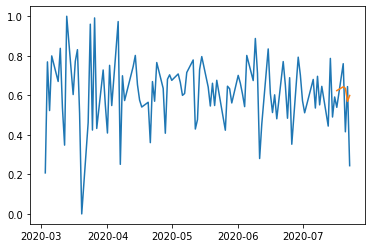

In [306]:
plt.plot(closes['delta_day'])
plt.plot(forecast['delta_day'])

In [320]:
closes[:-5]

,delta_day,pct_new_deaths,daily,fract_high,fract_low,pct_new_cases
Date,,,,,,
2020-03-03,0.207603,0.000000,0.569707,0.007382,0.757534,0.020068
2020-03-04,0.769146,0.655172,0.272341,0.326200,0.141379,0.070072
2020-03-05,0.522944,0.008621,0.197481,0.186132,0.176908,0.122106
2020-03-06,0.799344,0.310345,0.262421,0.437007,0.032511,0.006557
2020-03-09,0.670108,0.008621,0.505045,0.766152,0.033976,0.000000
...,...,...,...,...,...,...
2020-07-10,0.645301,0.106757,0.042930,0.088222,0.082528,0.034933
2020-07-13,0.444323,0.110941,0.421659,0.385761,0.263854,0.029900
2020-07-14,0.786686,0.395358,0.282336,0.354535,0.128281,0.039832


In [356]:
mod = sm.tsa.VARMAX(closes[:-5], order=(5,1))
res = mod.fit(maxiter=1000, disp=False)
res.summary()

/Users/craigledgerwood/ml_venv/lib/python3.6/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/craigledgerwood/ml_venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Dep. Variable:,"['delta_day', 'pct_new_deaths', 'daily', 'fract_high', 'fract_low', 'pct_new_cases']",No. Observations:,95
Model:,"VARMA(5,1)",Log Likelihood,1024.642
,+ intercept,AIC,-1563.284
Date:,"Sun, 26 Jul 2020",BIC,-942.692
Time:,23:24:31,HQIC,-1312.519
Sample:,0,,
,- 95,,
Covariance Type:,opg,,
Ljung-Box (Q):,"39.30, 25.44, 36.58, 34.72, 29.81, 32.32",Jarque-Bera (JB):,"2.11, 218.26, 1.83, 58.32, 14.48, 5.26"
Prob(Q):,"0.50, 0.96, 0.63, 0.71, 0.88, 0.80",Prob(JB):,"0.35, 0.00, 0.40, 0.00, 0.00, 0.07"
Heteroskedasticity (H):,"1.19, 0.85, 0.93, 0.58, 0.70, 0.68",Skew:,"-0.31, 2.15, 0.31, 1.04, 0.34, 0.40"


In [322]:
pred = res.predict()

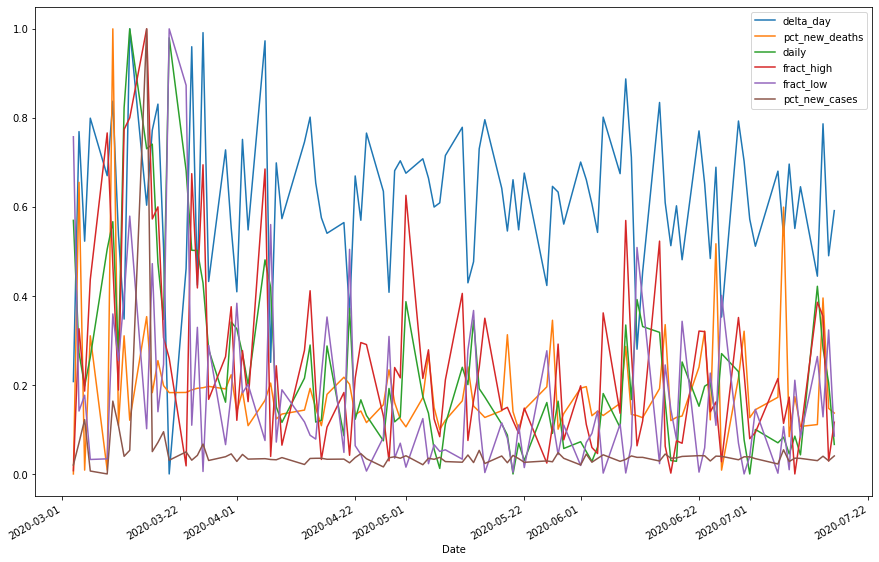

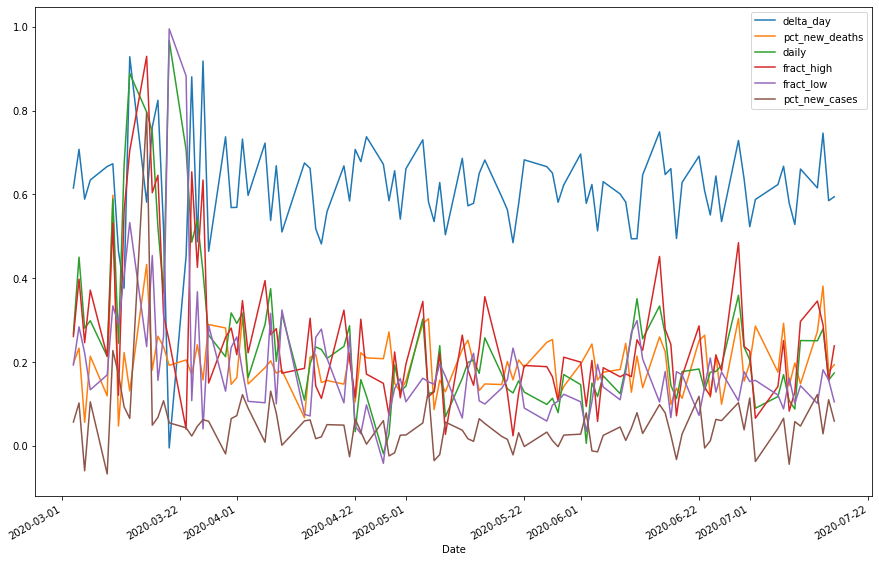

In [323]:
import matplotlib.pyplot as plt
closes[:-5].plot(figsize=(15,10))
pred.plot(figsize=(15,10))

In [353]:
res.forecast(5)

/Users/craigledgerwood/ml_venv/lib/python3.6/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/craigledgerwood/ml_venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,delta_day,pct_new_deaths,daily,fract_high,fract_low,pct_new_cases
95,0.696361,0.038960,0.236743,0.294225,0.127498,-0.047734
96,0.568662,0.244661,0.247355,0.243818,0.185839,0.156490
97,0.695441,0.235660,0.145696,0.185358,0.116699,0.048399
98,0.526436,0.190661,0.115603,0.112533,0.145482,0.015410
99,0.685971,0.121260,0.122734,0.186444,0.090200,-0.043541


In [354]:
closes[-5:]

,delta_day,pct_new_deaths,daily,fract_high,fract_low,pct_new_cases
Date,,,,,,
2020-07-17,0.539202,0.131532,0.044862,0.015358,0.150027,0.024234
2020-07-20,0.759954,0.169506,0.170248,0.299485,0.044710,0.029142
2020-07-21,0.415394,0.350376,0.176040,0.002993,0.313779,0.033383
2020-07-22,0.644171,0.153505,0.050936,0.180772,0.009157,0.036914
2020-07-23,0.244011,0.126244,0.481295,0.003609,0.661617,0.027358


In [ ]:
from scipy.stats. import 

In [327]:
len(idx[:-nforecast])

95

In [330]:
len(predict.predicted_mean[:-nforecast-1])

95

In [332]:
mod.nobs + nforecast

100

In [333]:
len(closes)

100

In [338]:
closes

,delta_day,pct_new_deaths,daily,fract_high,fract_low,pct_new_cases
Date,,,,,,
2020-03-03,0.207603,0.000000,0.569707,0.007382,0.757534,0.020068
2020-03-04,0.769146,0.655172,0.272341,0.326200,0.141379,0.070072
2020-03-05,0.522944,0.008621,0.197481,0.186132,0.176908,0.122106
2020-03-06,0.799344,0.310345,0.262421,0.437007,0.032511,0.006557
2020-03-09,0.670108,0.008621,0.505045,0.766152,0.033976,0.000000
...,...,...,...,...,...,...
2020-07-17,0.539202,0.131532,0.044862,0.015358,0.150027,0.024234
2020-07-20,0.759954,0.169506,0.170248,0.299485,0.044710,0.029142
2020-07-21,0.415394,0.350376,0.176040,0.002993,0.313779,0.033383


In [335]:
len(predict.predicted_mean)

101

In [337]:
predict.predicted_mean[:-1]

,delta_day,pct_new_deaths,daily,fract_high,fract_low,pct_new_cases
0,0.615113,0.196704,0.267266,0.260858,0.192741,0.056672
1,0.707521,0.233047,0.450204,0.397768,0.283963,0.102052
2,0.588668,0.055919,0.280700,0.246146,0.221608,-0.059679
3,0.634334,0.213676,0.298444,0.371448,0.133557,0.104925
4,0.666605,0.119207,0.213237,0.213877,0.169166,-0.067242
...,...,...,...,...,...,...
95,0.696361,0.038960,0.236743,0.294225,0.127498,-0.047734
96,0.568662,0.244661,0.247355,0.243818,0.185839,0.156490
97,0.695441,0.235660,0.145696,0.185358,0.116699,0.048399
98,0.526436,0.190661,0.115603,0.112533,0.145482,0.015410


In [349]:
predict_ci.columns.to_list()

['lower delta_day',
 'lower pct_new_deaths',
 'lower daily',
 'lower fract_high',
 'lower fract_low',
 'lower pct_new_cases',
 'upper delta_day',
 'upper pct_new_deaths',
 'upper daily',
 'upper fract_high',
 'upper fract_low',
 'upper pct_new_cases']

/Users/craigledgerwood/ml_venv/lib/python3.6/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/craigledgerwood/ml_venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


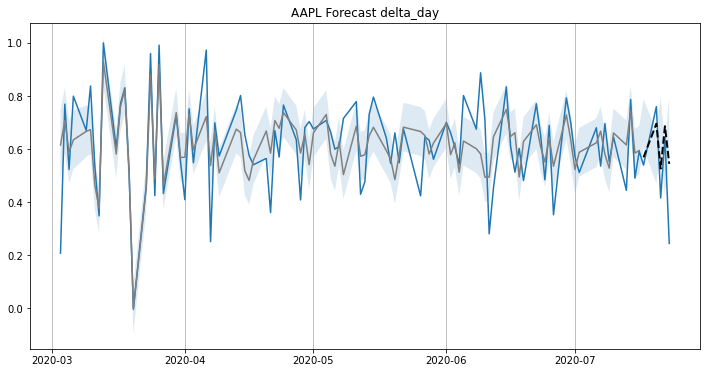

In [352]:
# In-sample one-step-ahead predictions, and out-of-sample forecasts
nforecast = 5
predict = res.get_prediction(end=mod.nobs + nforecast)
idx = closes.index
predict_ci = predict.conf_int(alpha=0.5)

# Graph
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.grid()
ax.plot(closes['delta_day'])

# Plot
ax.plot(idx[:-nforecast], predict.predicted_mean[:-(nforecast+1)]['delta_day'], 'gray')
ax.plot(idx[-nforecast:], predict.predicted_mean[-nforecast:]['delta_day'], 'k--', linestyle='--', linewidth=2)
ax.fill_between(idx, predict_ci['lower delta_day'][:-1], predict_ci['upper delta_day'][:-1], alpha=0.15)

ax.set(title='AAPL Forecast delta_day');

In [344]:
predict_ci

,lower delta_day,lower pct_new_deaths,lower daily,lower fract_high,lower fract_low,lower pct_new_cases,upper delta_day,upper pct_new_deaths,upper daily,upper fract_high,upper fract_low,upper pct_new_cases
0,0.485803,0.109893,0.113863,0.103937,0.049205,-0.017305,0.744424,0.283515,0.420669,0.417779,0.336278,0.130649
1,0.583839,0.151105,0.336204,0.270311,0.155645,0.043921,0.831203,0.314988,0.564204,0.525226,0.412281,0.160183
2,0.470557,-0.024858,0.172403,0.122887,0.095528,-0.109027,0.706779,0.136696,0.388997,0.369404,0.347688,-0.010331
3,0.523170,0.137177,0.196825,0.252598,0.018686,0.057889,0.745497,0.290176,0.400063,0.490297,0.248429,0.151960
4,0.569721,0.043883,0.128019,0.106327,0.069912,-0.107894,0.763489,0.194531,0.298456,0.321427,0.268420,-0.026589
...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.468941,0.170638,0.158509,0.132636,0.092483,0.114212,0.668383,0.318685,0.336201,0.355001,0.279195,0.198768
97,0.594351,0.158552,0.044693,0.069729,0.017388,-0.000701,0.796531,0.312768,0.246698,0.300986,0.216011,0.097499
98,0.423180,0.110764,0.004093,-0.006754,0.039597,-0.036318,0.629692,0.270557,0.227113,0.231819,0.251367,0.067138
99,0.572820,0.038195,0.002502,0.049513,-0.021855,-0.107769,0.799121,0.204324,0.242967,0.323374,0.202255,0.020687


In [25]:
min_max_scaler.inverse_transform(res.forecast(5))

/Users/craigledgerwood/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/craigledgerwood/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


array([[ 281.27791747, 2317.21806845,   68.76941964, 1251.33920236,
         176.06773032,  720.61417719],
       [ 275.16164454, 2317.03522362,   67.17934683, 1246.46096641,
         171.61340982,  665.63348649],
       [ 270.53809048, 2307.83734018,   67.06643792, 1259.58143649,
         171.99974522,  688.30684476],
       [ 276.67783065, 2308.53450069,   68.94728948, 1272.64591245,
         175.32393803,  714.41126234],
       [ 275.17404066, 2280.61450857,   68.3721136 , 1264.84585231,
         172.16418386,  686.24199387]])

In [244]:
(0.685971-0.572820)/.685971

0.16495012179815183

In [27]:
min_max_scaler.data_min_

array([ 224.36999512, 1676.60998535,   54.79000092, 1056.61999512,
        135.41999817,  361.22000122])